In [1]:
# importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numba import njit

sns.set_context('talk')

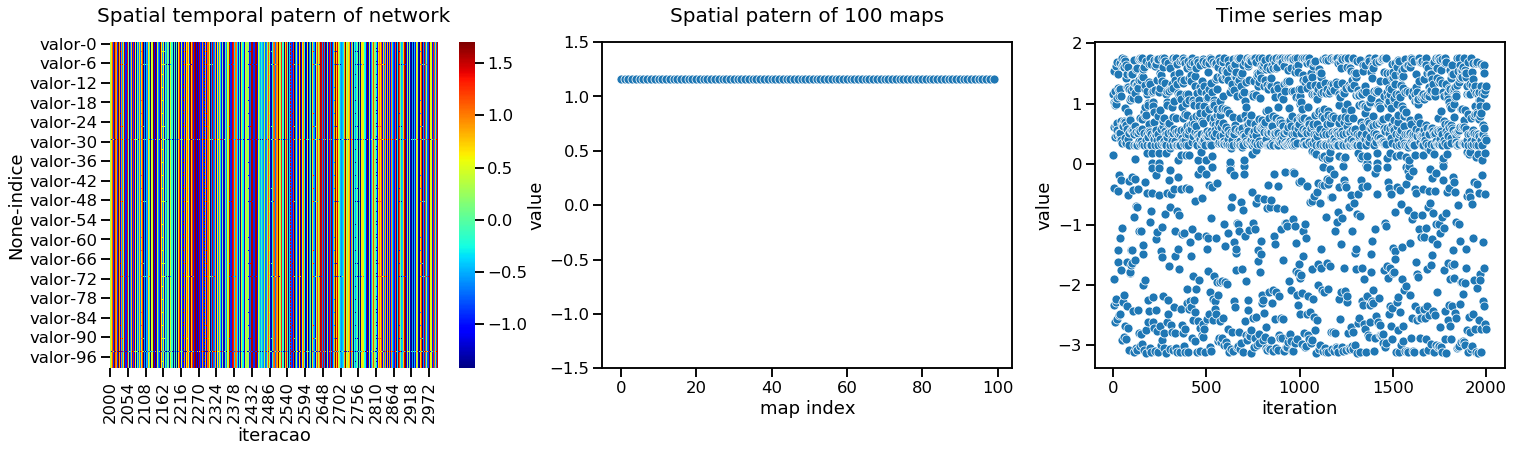

In [92]:
! gcc rulkov-global.c -o x.x -lm
! ./x.x

dado_patricio = pd.read_csv('quimera_ultimo.dat', sep=' ',
                           header=None)
dado_patricio.columns = ['indice','valor']

dado_patricio_spatial_temporal = pd.read_csv('quimera.dat', header=None, sep=' ')
dado_patricio_spatial_temporal.columns = ['indice', 'iteracao','valor']
dados_spaco_temporal = dado_patricio_spatial_temporal.pivot('iteracao','indice')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,6))

periodo = np.arange(2000,3000,2)


sns.heatmap(data = dados_spaco_temporal.loc[periodo].T,ax=ax[0], cmap='jet')
sns.scatterplot(data = dados_spaco_temporal.iloc[1000,:].values, ax=ax[1])
sns.scatterplot(data = dados_spaco_temporal.iloc[:,60].diff().values, ax=ax[2])


ax[0].set_title('Spatial temporal patern of network', fontsize=20, pad=20)

ax[1].set_title('Spatial patern of 100 maps', fontsize=20, pad=20)
ax[1].set_ylim(-1.5, 1.5)
ax[1].set_ylabel('value')
ax[1].set_xlabel('map index')


ax[2].set_title('Time series map', fontsize=20, pad=20)
ax[2].set_ylabel('value')
ax[2].set_xlabel('iteration')


fig;


teste = pd.DataFrame(dados_spaco_temporal.values)

plt.figure()
sns.heatmap(data = teste.iloc[500:600, :].T, cmap='jet')

plt.show()

In [95]:
def diagnostics(xdata, delta=0.02, p=1, return_vecs=False, sample_size=2):
    n = len(xdata)
    distmat = np.zeros((n, n))
    aux_distmat = np.zeros((n, n))
    recmat = np.zeros((n, n))
    signvec = np.zeros(n)
    
    for i in range(0, sample_size, p):
        # Get the distance matrix
        for j in range(n):
            aux_distmat[:, j] = xdata[:, i]
        distmat += np.abs(aux_distmat - aux_distmat.transpose())
    distmat = distmat/(sample_size)
    # Get the recurrence matrix
    recmat[np.where(distmat < delta)] = 1
    # Get the recurrence rate
    RR = np.sum(recmat)/n**2
    evals, evecs = np.linalg.eig(recmat)
    idx = evals.argsort()[::-1]   
    evals = evals[idx]
    evecs = evecs[:,idx]
    # Sign vector
    j = 0
    while evals[j] > 1.0:
        signvec += abs(evecs[:, j])
        j += 1
    signvec[np.where(signvec > 1e-8)] = 1.0
    # Sum all the elements of signvec to use as the diagnostic
    csum = np.sum(signvec)

    if return_vecs:
        return (csum, RR), distmat, recmat, signvec
    else:
        return (csum, RR)


(100.0, 1.0)


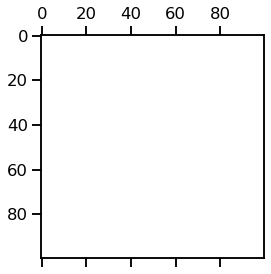

In [96]:
xdata = dados_spaco_temporal.values

diagnostic, distmat, recmat, signvec = diagnostics(xdata.T, return_vecs=True)

print(diagnostic)
plt.matshow(recmat, cmap='binary')
plt.show()